# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. `Pandas` и `Seaborn`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 4 балла
* Задача 2 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 5 баллов
* Задача 4 &mdash; 3 балла
* Задача 5 &mdash; 8 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

warnings.filterwarnings('ignore')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv` со следующими полями:
* `school` &mdash; номер школы;
* `test_score` &mdash; результат одного ученика из этой школы;
* `number_of_students` &mdash; кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

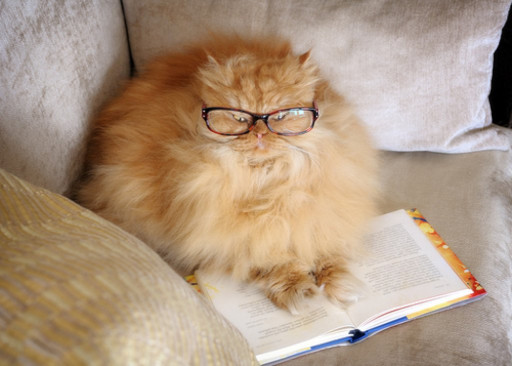

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

*Подсказка.* Это можно сделать с помощью методов  <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [2]:
exam_results = pd.read_csv('cat_exam_data.csv')
exam_results.head(5)

school  test_score  number_of_students
0      26        39.0                 965
1      54        64.0                1483
2     356        64.0                1055
3     108        68.0                1806
4     298        78.0                 971

Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [3]:
print(exam_results.isna().any())
exam_results = exam_results.dropna()

school                False
test_score             True
number_of_students    False
dtype: bool


Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.

In [4]:
exam_results.describe()

school     test_score  number_of_students
count  501358.000000  501358.000000       501358.000000
mean      250.096795      51.681788         1088.910569
std       144.428420      14.179981          281.016801
min         0.000000      -0.000000          156.000000
25%       125.000000      42.000000          890.000000
50%       250.000000      52.000000         1079.000000
75%       377.000000      61.000000         1285.000000
max       499.000000     100.000000         1806.000000

Отдельного внимания заслуживает среднее. Какими способами его можно посчитать? Произведите вычисления и *подробно* проинтерпретируйте результаты. Что стоит публиковать в официальной статистике?

In [5]:
res = exam_results
for_mean = [res.school.mean(),res.test_score.mean(),res.number_of_students.mean()]
for_median = [res.school.median(),res.test_score.median(),res.number_of_students.median()]
for_mode_prev = [res.school.mode()[0],res.test_score.mode()[0],res.number_of_students.mode()[0]]
index = ['school', 'test_score', 'number_of_studens']
data = {'Математическое ожидание': pd.Series(for_mean, index = index),
     'Медиана': pd.Series( for_median, index=index),
     'Мода': pd.Series(for_mode_prev, index=index)
     
    }
final_results = pd.DataFrame(data)
final_results

Математическое ожидание  Медиана    Мода
school                          250.096795    250.0   108.0
test_score                       51.681788     52.0    52.0
number_of_studens              1088.910569   1079.0  1244.0

Среднее можно посчитать несколькими способами: можно вычислить математическое ожидание, можно найти медианное значение, а можно найти и моду, то есть самое повторяющееся значение. Что из этого стоит публиковать в официальной статистике? Для полной информации лучше публиковать все. Если же выбирать одно или два из трех, то стоит отказаться в первую очередь от моды. Главная причина -- если данные непрерывны, то есть равенство происходит крайне редко, то мода может показать вообще произвольное значение.

Посчитайте сколько котиков получили 100 баллов.

In [6]:
len(exam_results[exam_results.test_score == 100])

51

Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.
Отсортируйте эти школы по количеству стобалльников.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [7]:
full_score_stats = exam_results[exam_results.test_score == 100]
schools = full_score_stats.groupby('school').count().sort_values(by='number_of_students', ascending = False)
schools[['number_of_students']]

number_of_students
school                    
486                      2
4                        1
395                      1
302                      1
303                      1
315                      1
328                      1
342                      1
346                      1
351                      1
357                      1
359                      1
394                      1
403                      1
14                       1
412                      1
414                      1
425                      1
429                      1
436                      1
451                      1
463                      1
471                      1
483                      1
283                      1
282                      1
261                      1
256                      1
18                       1
42                       1
69                       1
82                       1
90                       1
91                       1
96                       1
98                       1
101                      1
105                      1
111                      1
113                      1
114                      1
120                      1
184                      1
195                      1
206                      1
226                      1
229                      1
232                      1
233                      1
498                      1

Посчитайте средний результат каждой из школ и посмотрите на результат. Рассматриваем все школы, не только со стобальниками.

*Подсказка.* Может помочь метод <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [8]:
school_stats = exam_results.groupby('school').mean()
school_stats.head()

test_score  number_of_students
school                                
0        52.294258                 418
1        52.028950                1209
2        51.751451                1035
3        51.566265                1245
4        51.025641                1015

Отсортируйте школы по среднему результату.

In [9]:
sorted_by_score = school_stats.sort_values('test_score',ascending = False)

Посмотрите на топ 10 лучших результатов.

In [10]:
sorted_by_score.head(10)

test_score  number_of_students
school                                
57       53.341682                 560
124      52.993311                 598
263      52.982063                 669
82       52.981982                 555
366      52.970207                 773
465      52.957555                1179
169      52.932401                 858
449      52.910364                 357
477      52.898515                 808
464      52.865429                 431

**Вывод:** В каждой школе средний результат не превосходит 53.35. В каждой школе, за исключением школы №486, не более одного стобальника.

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.

In [11]:
sorted_by_score.tail(10)

test_score  number_of_students
school                                
383      50.716981                 636
264      50.702906                 929
48       50.690293                 649
156      50.641354                1093
394      50.461538                1079
194      50.406977                 774
471      50.362500                 960
486      50.325000                 800
211      50.248571                 351
353      50.050595                 336

**Вывод:** Предположение оказалось неверным. Медианное количество учеников в школе равно 1079, среднее значение -- 1088. Среди худших 10 школ лишь у одной количество учеников оказалось больше этих значений.

Постройте график зависимости среднего результата ЕКЭ от количества учеников.

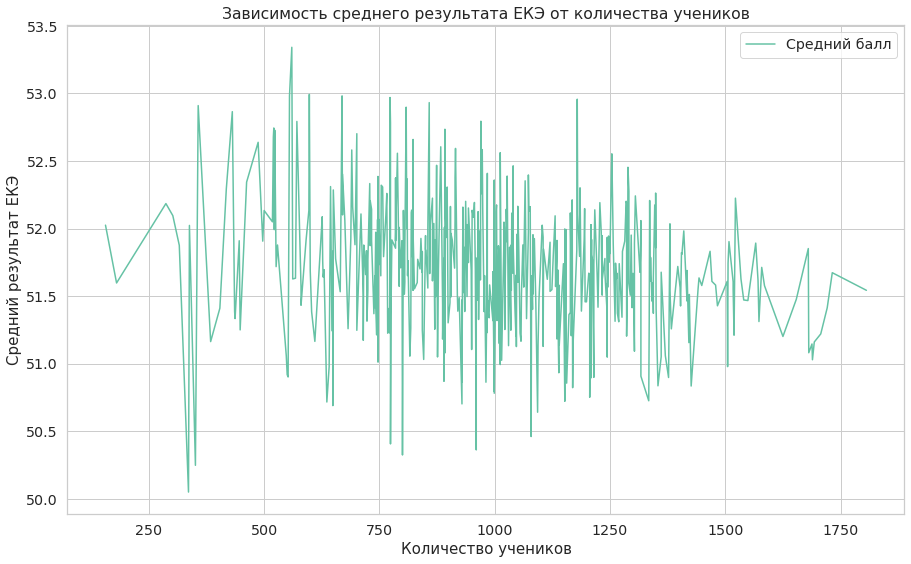

In [12]:
plt.figure(figsize=(15, 9))
plt.plot(
    np.array(school_stats.sort_values('number_of_students').number_of_students),
    np.array(school_stats.sort_values('number_of_students').test_score),
    label = 'Средний балл'
    
)
plt.title('Зависимость среднего результата ЕКЭ от количества учеников')
plt.ylabel('Cредний результат ЕКЭ', fontsize = 15)
plt.xlabel('Количество учеников', fontsize = 15)
plt.legend()
plt.show()

**Вывод:** Явной зависимости среднего результата от количества учеников в школе подобрать не удается.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников.

In [13]:
small_schools = school_stats[school_stats.number_of_students <= 1000]
big_schools = school_stats[school_stats.number_of_students > 1000]

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` &mdash; число бинов гистограммы;
* `alpha=0.5` &mdash; прозрачность бинов.

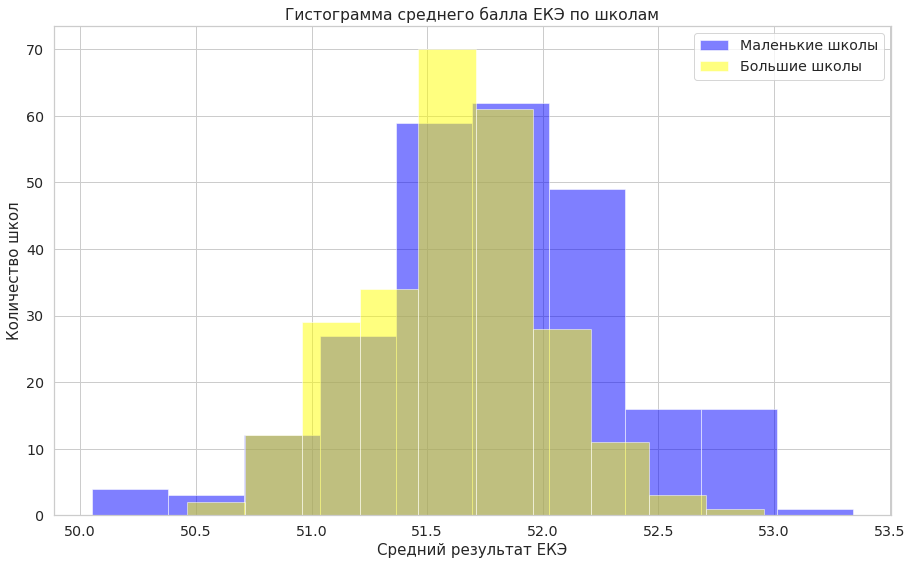

In [14]:
plt.figure(figsize=(15, 9))
plt.hist(
    np.array(small_schools.test_score),
    bins = 10,
    alpha = 0.5,
    color = 'blue',
    label = 'Маленькие школы'
)
plt.hist(
    np.array(big_schools.test_score),
    bins = 10,
    alpha = 0.5,
    color = 'yellow',
    label = 'Большие школы'
)
plt.title('Гистограмма среднего балла ЕКЭ по школам')
plt.ylabel('Количество школ', fontsize = 15)
plt.xlabel('Cредний результат ЕКЭ', fontsize = 15)
plt.legend()
plt.show()

**Вывод:** У больших школ средний балл варируется меньше, он близок к значению 51.5. У маленьких школ средний балл варируется больше, чаще наблюдаются худшие и лучшие результаты.

---

### Задача 2

Задача заключается в работе с данными о трендах на <a target="_blank" href="https://www.youtube.com/">YouTube</a>. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

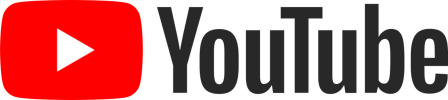


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a target="_blank" href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

*Замечание. Часто считывание дат &mdash; головная боль аналитика.*

In [15]:
videos = pd.read_csv('RUvideos_short.csv')
videos['trending_date'] = pd.to_datetime(videos.trending_date,format = '%y.%d.%m')
videos.head(7)

video_id trending_date                                         title  \
0  gDuslQ9avLc    2017-11-14               Захар и Полина учатся экономить   
1  AOCJIFEA_jE    2017-11-14              Биржа Мемов #29. Большой выпуск   
2  VAWNQDgwwOM    2017-11-14                  ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ   
3  gknkFwKQfHg    2017-11-14                    Сочная кесадилья с курицей   
4  3sYvZcwzZr8    2017-11-14         КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ   
5  SLF34Gt_UxQ    2017-11-14    АНОНС / Versus Fresh Blood 4: Война Стилей   
6  YVcroDDi24s    2017-11-14  ЗАМОРОЗКА ЧЕЛОВЕКА + 1 К БЕССМЕРТИЮ — ТОПЛЕС   

    channel_title  category_id              publish_time  \
0       Т—Ж БОГАЧ           22  2017-11-13T09:09:31.000Z   
1    Druzhko Show           22  2017-11-13T17:32:11.000Z   
2            Юлик           24  2017-11-13T16:11:31.000Z   
3        Hochland           22  2017-11-13T06:51:10.000Z   
4        Совергон           24  2017-11-13T16:52:36.000Z   
5  versusbattleru           24  2017-11-12T17:50:31.000Z   
6          ТОПЛЕС           28  2017-11-12T17:19:59.000Z   

                                                tags    views  likes  \
0  захар и полина|"учимся экономить"|"копить день...    62408    334   
1  биржа мемов|"лев шагинян"|"мемы"|"пикчи"|"друж...   330043  43841   
2  юмор|"комедия"|"влог"|"блог"|"смешно"|"смешное...   424596  49854   
3  хохланд|"сыр"|"рецепты"|"как приготовить"|"вку...   112851   3566   
4  Совергон|"Sovergon"|"клипы"|"родители"|"школа"...   243469  36216   
5                                             [none]   733936  47964   
6  топлес|"ян топлес"|"ян лапотков"|"caramba"|"to...  1131851  78692   

   dislikes  comment_count                                  thumbnail_link  \
0       190             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1      2244           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2       714           2944  https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg   
3       122             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
4       631           1692  https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg   
5      2545           3901  https://i.ytimg.com/vi/SLF34Gt_UxQ/default.jpg   
6      2427           4114  https://i.ytimg.com/vi/YVcroDDi24s/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   
6              False             False                   False   

                                         description  
0  Знакомьтесь, это Захар и Полина. Вместе с ними...  
1  В 29 выпуске Дружко Шоу Сергей сказал, что Бир...  
2  http://kapitany.ru/!Yulik.cap - Факультет #Кап...  
3            *** как готовить ресторанные блюда дома  
4  ❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...  
5  Участвовать в проекте допускаются только лица ...  
6  Факультет Капитаны России, мой курс ► http://k...

В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` &mdash; дата в формате год-день-месяц;
* `category_id` &mdash; категория видео, названия приведены в файле `RU_category_id.json`;
* `views` &mdash; количество просмотров видео;
* `likes` &mdash; количество лайков;
* `dislikes` &mdash; количество дислайков;
* `comment_count` &mdash; количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у объекта даты. Напечатайте начало таблицы.

In [16]:
videos.trending_date = videos.trending_date.dt.day
videos = videos.rename(columns={"trending_date": "day"})
videos = videos[['day','category_id', 'views','likes','dislikes' , 'comment_count']]
videos.head(8)

day  category_id    views  likes  dislikes  comment_count
0   14           22    62408    334       190             50
1   14           22   330043  43841      2244           2977
2   14           24   424596  49854       714           2944
3   14           22   112851   3566       122             80
4   14           24   243469  36216       631           1692
5   14           24   733936  47964      2545           3901
6   14           28  1131851  78692      2427           4114
7   14           22    97006   2259       330            887

<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

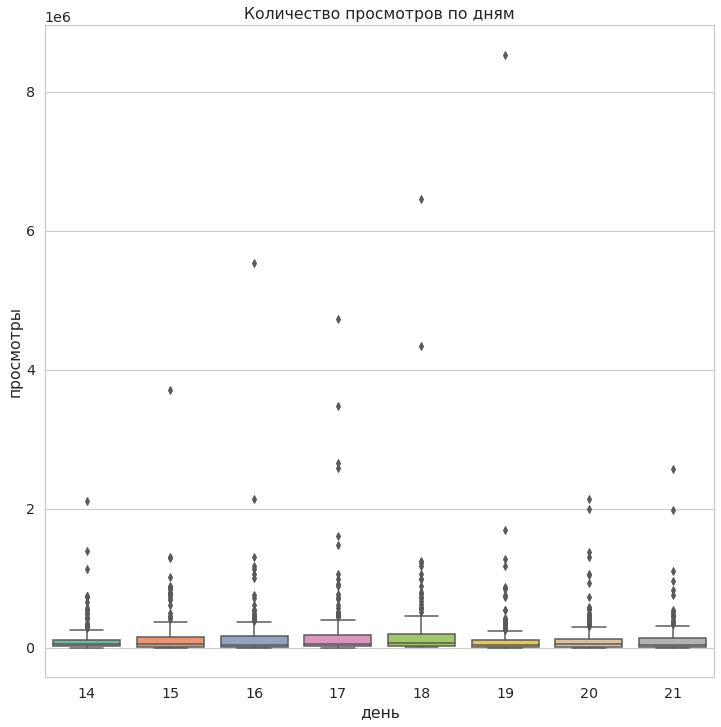

In [17]:
plt.figure(figsize = (12,12))
views_graph = sns.boxplot(x = 'day', y = 'views', data = videos)
views_graph.set_title('Количество просмотров по дням')
views_graph.set(xlabel = 'день', ylabel = 'просмотры')
plt.show()

График получился неинформативным из-за сильных выбросов.

Исправьте этот недостаток, установив некоторое значение. 

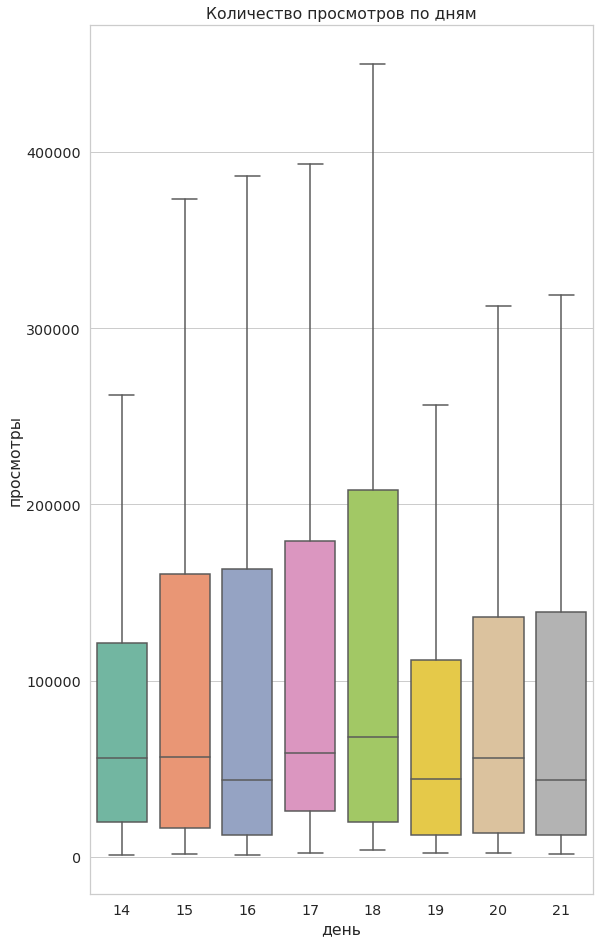

In [69]:
plt.figure(figsize = (9,16))
views_graph = sns.boxplot(x = 'day', y = 'views', data = videos, showfliers = False)
views_graph.set_title('Количество просмотров по дням')
views_graph.set(xlabel = 'день', ylabel = 'просмотры')
plt.show()

Постройте `jointplot` по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

<Figure size 1440x864 with 0 Axes>

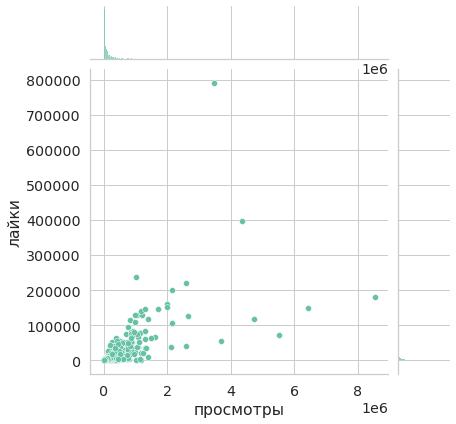

In [19]:
plt.figure(figsize = (20,12))
views_likes_graph = sns.jointplot(x = 'views',y = 'likes', data = videos)
views_likes_graph.ax_joint.set_xlabel('просмотры')
views_likes_graph.ax_joint.set_ylabel('лайки')
plt.show()

В очередной раз график получился сжатым и неинформативным из-за выбросов.

Исправьте этот недостаток.

<Figure size 1152x864 with 0 Axes>

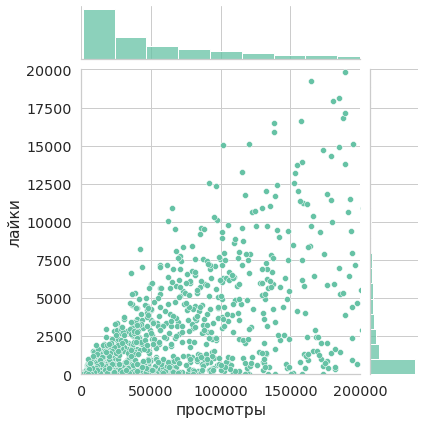

In [20]:
plt.figure(figsize = (16,12))
views_likes_graph = sns.jointplot(x = 'views',y = 'likes', data = videos, xlim = (0,200000), ylim = (0,20000))
views_likes_graph.ax_joint.set_xlabel('просмотры')
views_likes_graph.ax_joint.set_ylabel('лайки')
plt.show()


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 3

<a target="_blank" href="https://www.netflix.com">Netflix</a> за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


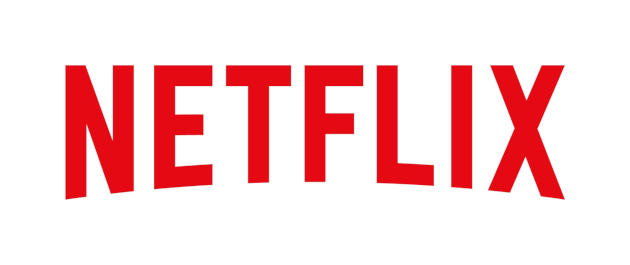

Описание признаков:
* `title` &mdash; название шоу;
* `rating` &mdash; рейтинг шоу. Например: G, PG, TV-14, TV-MA;
* `ratingLevel` &mdash; описание рейтинговой группы и особенностей шоу;
* `release year` &mdash; год выпуска шоу;
* `user rating score` &mdash; оценка пользователей.


Загрузите данные, выполнив код ниже.

In [21]:
data = pd.read_csv('netflix_data.csv', encoding='cp437')

del data['ratingDescription'], data['user rating size']
data.head(5)

title rating  \
0           White Chicks  PG-13   
1    Lucky Number Slevin      R   
2         Grey's Anatomy  TV-14   
3           Prison Break  TV-14   
4  How I Met Your Mother  TV-PG   

                                         ratingLevel  release year  \
0  crude and sexual humor, language and some drug...          2004   
1  strong violence, sexual content and adult lang...          2006   
2  Parents strongly cautioned. May be unsuitable ...          2016   
3  Parents strongly cautioned. May be unsuitable ...          2008   
4  Parental guidance suggested. May not be suitab...          2014   

   user rating score  
0               82.0  
1                NaN  
2               98.0  
3               98.0  
4               94.0

Удалите из данных дупликаты. Сколько объектов удалено?

In [22]:
prev_size = data.shape[0]
data = data.drop_duplicates()
print(prev_size - data.shape[0])

500


Сколько объектов осталось?

In [23]:
data.shape[0]

500

Есть ли в данных пропуски?

Если да, то при дальнейшем анализе подумайте, как их корректнее обработать. Учтите, что многие методы умеют работать с пропусками.

In [24]:
print(data.isna().any())

title                False
rating               False
ratingLevel           True
release year         False
user rating score     True
dtype: bool


В дальнейшем нам придется работать в основном с данными из столбца "user rating score". Но пропуски есть не только в этом столбце, поэтому нельзя сразу использовать метод dropna().

Сколько рейтинговых групп представлено в данных?

In [25]:
len(data.groupby('rating'))

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

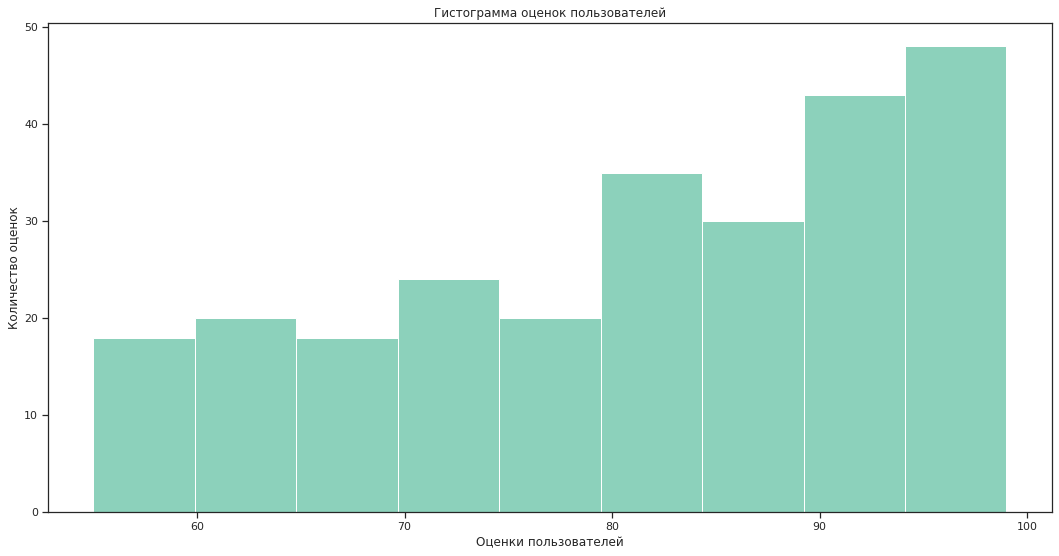

In [70]:
plt.figure(figsize = (18,9))
with sns.plotting_context("notebook"), sns.axes_style("ticks"):
    hist = sns.histplot(data['user rating score'], kde = False)
    hist.set_title('Гистограмма оценок пользователей')
    hist.set(xlabel = 'Оценки пользователей', ylabel = 'Количество оценок')

**Вывод:** Пользователи ставят чаще оценки от 80 баллов. Все оценки больше 50 баллов.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [27]:
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

**Ответ:** В данном случае мы можем наблюдать что медиана и среднее различаются на 2 единицы, что не особенно много. Однако бывают данные, на которых эти характеристики могут достаточно сильно различаться. Происходить это может из-за сильных выбросов в одну из сторон. В качестве примера можем рассмотреть средний возраст Воспитателя и группы из 6 детей. Каждом ребенку по 3 года, воспитателю -- 60 лет. Тогда, медиана равна 3, а среднее равно 13 -- разница в 3.5 раза!

В какие годы были запущены шоу, представленные в датасете?

In [28]:
years = sorted(data['release year'].drop_duplicates())
print(years)

[1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

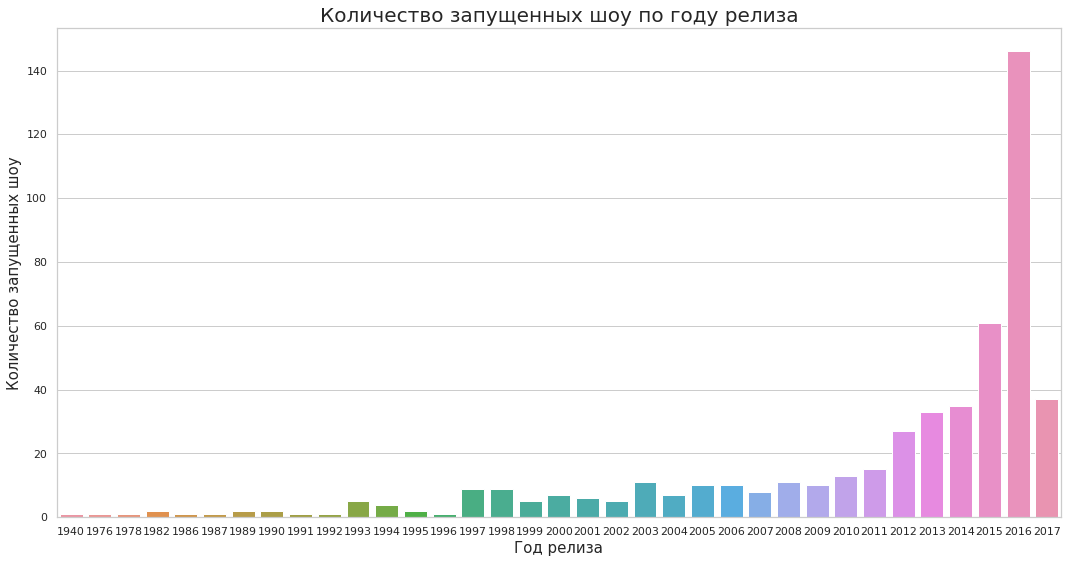

In [29]:
plt.figure(figsize = (18,9))
groupped_by_year = data[['release year', 'title']].groupby('release year').count().reset_index()
with sns.plotting_context('notebook'):
    sns.barplot(x = groupped_by_year['release year'],
                y = groupped_by_year['title'],
                ) 
    plt.title('Количество запущенных шоу по году релиза', fontsize = 20)
    plt.ylabel('Количество запущенных шоу', fontsize = 15)
    plt.xlabel('Год релиза', fontsize = 15)

**Вывод:** С 2010 года наблюдается стабильный рост. Явных выбросов до 2014 года нету. 2015 и 2016 являются выбросами, про 2017 год точно пока сказать нельзя, так как статистика дана на июль 2017 года.

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? "Успешнее" означает, что пользователи в среднем ставили более высокие оценки.
Ответить на этот вопрос вам поможет график, который вы построили выше.

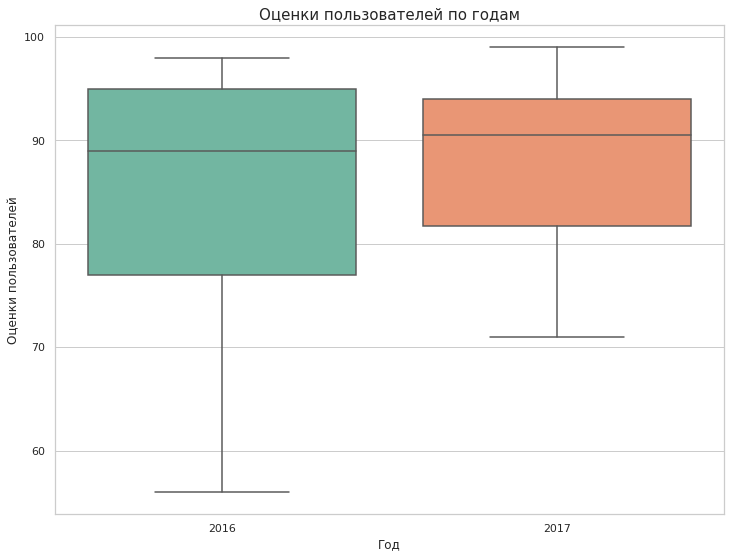

In [30]:
two_years_data = data[(data['release year'] == 2016) | (data['release year'] == 2017)]
with sns.plotting_context('notebook'):
    plt.figure(figsize = (12,9))
    sns.boxplot(x = 'release year', y = 'user rating score', data = two_years_data)
    plt.ylabel('Оценки пользователей', fontsize = 12)
    plt.xlabel('Год', fontsize = 12)
    plt.title('Оценки пользователей по годам', fontsize = 15)

**Вывод:** Исходя из графика можно сделать вывод, что 2017 год был успешнее, так как значение средней оценки возросло на пару единиц.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? [Подсказка](https://mipt-stats.gitlab.io/courses/ad_fivt/Jobs.jpg)

Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

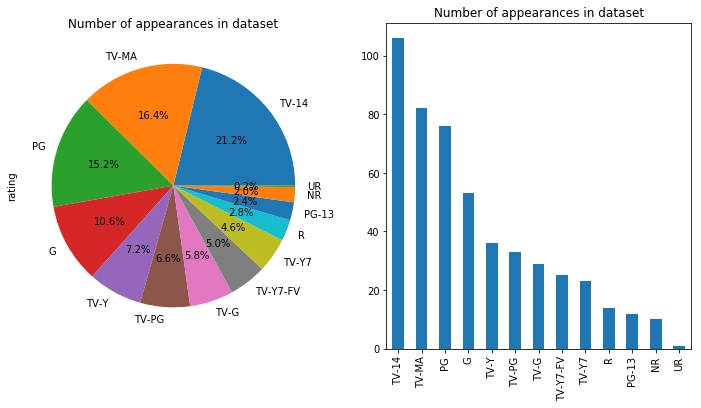

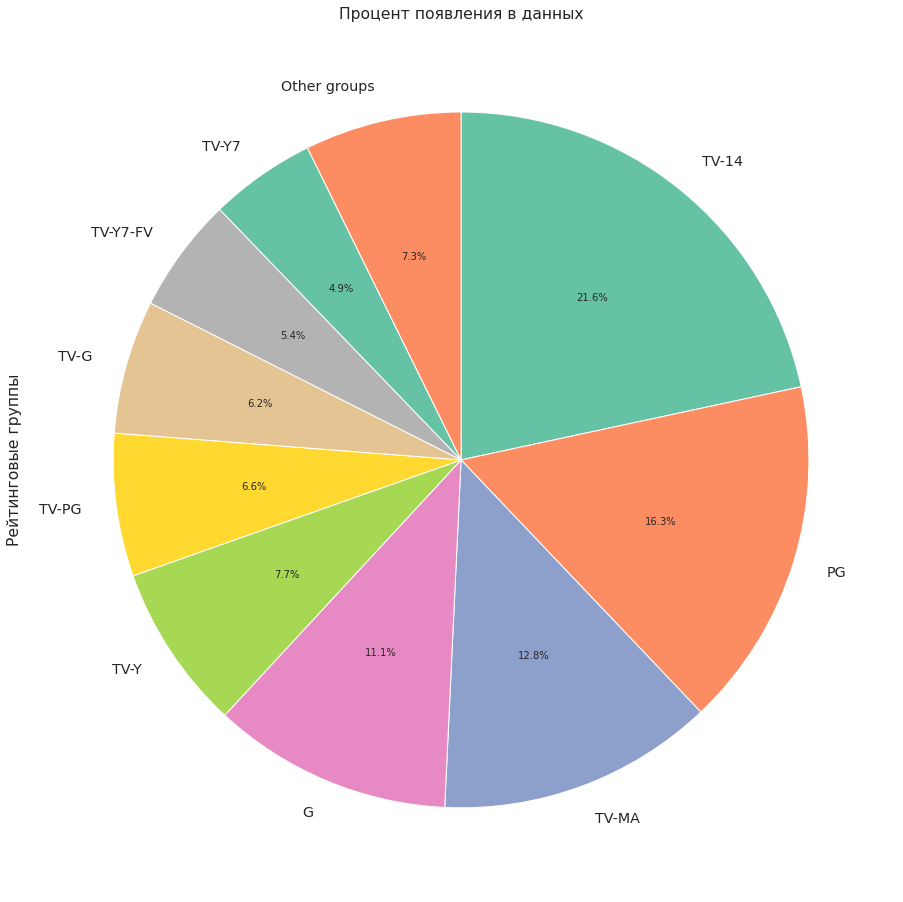

In [31]:
rating_info = data.groupby('rating').count().sort_values('ratingLevel', ascending = False)
rating_info = rating_info.ratingLevel
merged_small = pd.concat([rating_info[:9],
                          pd.Series(data={'Other groups': rating_info[9:].sum()})],
                         axis = 0)
plt.figure(figsize = (16,16))
labels = merged_small.index
plt.pie(merged_small,autopct='%1.1f%%', labels = labels,startangle=90,counterclock=False)
plt.ylabel('Рейтинговые группы')
plt.title('Процент появления в данных')
plt.show()

**Вывод:** Большая часть всех шоу находится в 4 рейтинговых группах: "TV-14", "PG", "G" и "TV_MA".

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится. Обозначим это шоу N.
Ответьте на следующие вопросы.
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

Проделаем сортировку всех шоу по оценкам пользователей

In [32]:
data[data['user rating score'].notna()].sort_values('user rating score', ascending = False).head(13)

title rating  \
41            13 Reasons Why  TV-MA   
350                     Lost  TV-14   
10          Once Upon a Time  TV-PG   
64                   Friends  TV-14   
72   Orange Is the New Black  TV-MA   
27                 The Flash  TV-PG   
25        Marvel's Iron Fist  TV-MA   
88              Finding Dory     PG   
62                Family Guy  TV-MA   
63            Criminal Minds  TV-14   
3               Prison Break  TV-14   
2             Grey's Anatomy  TV-14   
8           The Walking Dead  TV-MA   

                                           ratingLevel  release year  \
41   For mature audiences.  May not be suitable for...          2017   
350  Parents strongly cautioned. May be unsuitable ...          2010   
10   Parental guidance suggested. May not be suitab...          2016   
64   Parents strongly cautioned. May be unsuitable ...          2003   
72   For mature audiences.  May not be suitable for...          2016   
27   Parental guidance suggested. May not be suitab...          2016   
25                                                 NaN          2017   
88                              mild thematic elements          2016   
62   For mature audiences.  May not be suitable for...          2015   
63   Parents strongly cautioned. May be unsuitable ...          2016   
3    Parents strongly cautioned. May be unsuitable ...          2008   
2    Parents strongly cautioned. May be unsuitable ...          2016   
8    For mature audiences.  May not be suitable for...          2015   

     user rating score  
41                99.0  
350               98.0  
10                98.0  
64                98.0  
72                98.0  
27                98.0  
25                98.0  
88                98.0  
62                98.0  
63                98.0  
3                 98.0  
2                 98.0  
8                 98.0

Далее будем рассматривать шоу "Criminal minds". Найдем шоу, которое является худшим по оценкам в рейтинговой группе, к которой принадлежит "Criminal minds", то есть в группе "TV-14" 

In [33]:
tv_14_data = data[data.rating == 'TV-14']
min_rating = tv_14_data['user rating score'].min()
tv_14_data[tv_14_data['user rating score'] == min_rating]

title rating  \
179     Haters Back Off  TV-14   
212  Being Human (U.S.)  TV-14   

                                           ratingLevel  release year  \
179  Parents strongly cautioned. May be unsuitable ...          2016   
212  Parents strongly cautioned. May be unsuitable ...          2014   

     user rating score  
179               58.0  
212               58.0

Теперь узнаем, сколько шоу было выпущено в тот же год, что и "Criminal minds" (2016 год)

In [34]:
data_2016 = data[data['release year'] == 2016]
len(data_2016)

146

Найдем изменение средней оценки шоу, выпущенных в 2016 год, если бы не выпустили Criminal minds"

In [35]:
data_2016_without = data_2016.drop(63)
data_2016['user rating score'].mean() - data_2016_without['user rating score'].mean()

0.16101231190150145

Ответьте на следующие вопросы, проанализировав `boxplot`-график.
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет, за которые есть данные? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

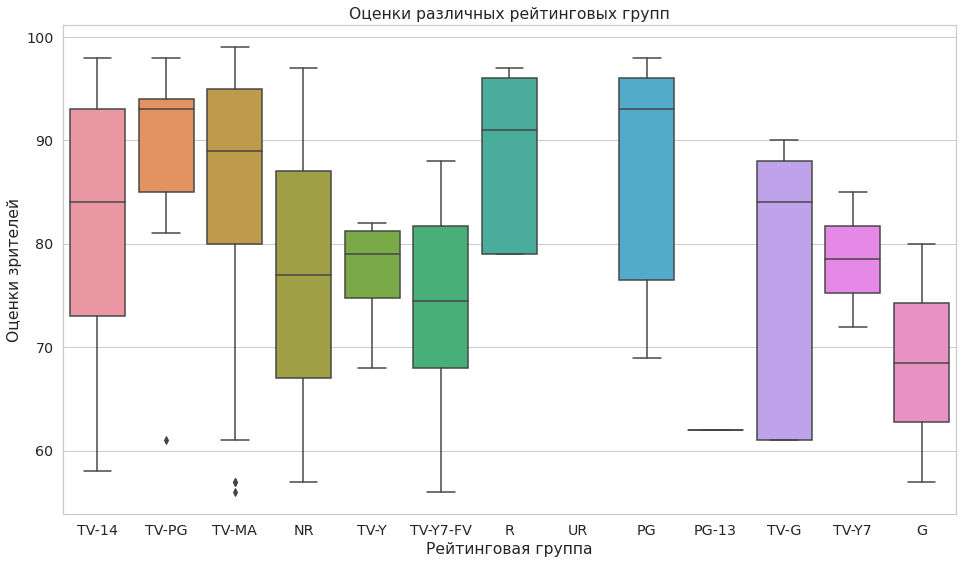

In [36]:
last_years_data = data[data['release year'] > data['release year'].max() - 5]
plt.figure(figsize = (16,9))
sns.boxplot(x='rating',y='user rating score',data = last_years_data)
plt.xlabel('Рейтинговая группа')
plt.ylabel('Оценки зрителей')
plt.title('Оценки различных рейтинговых групп')
plt.show()

**Вывод**: За последние 5 лет лучше всего оценивались 3 рейтинговые группы: "TV-PG", "R" и "PG".

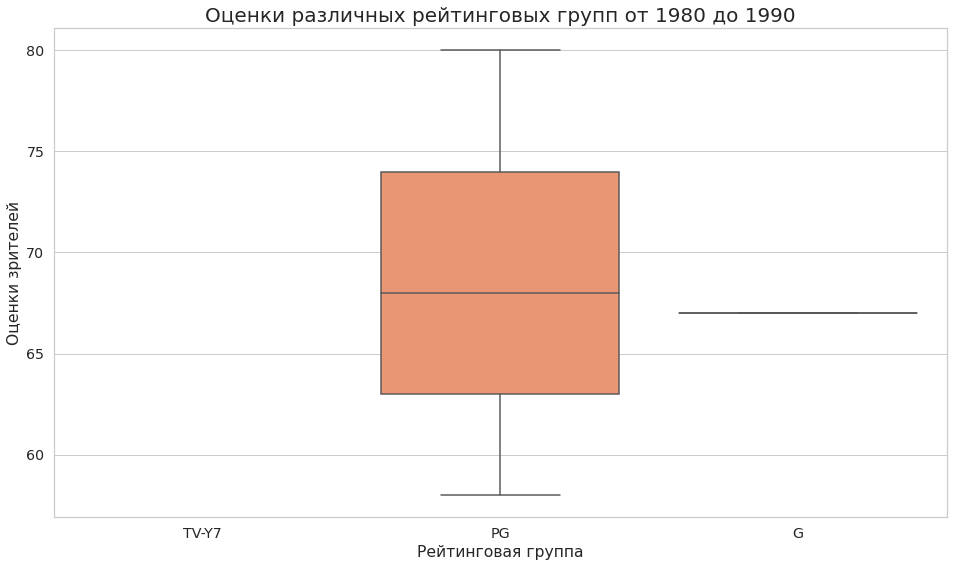

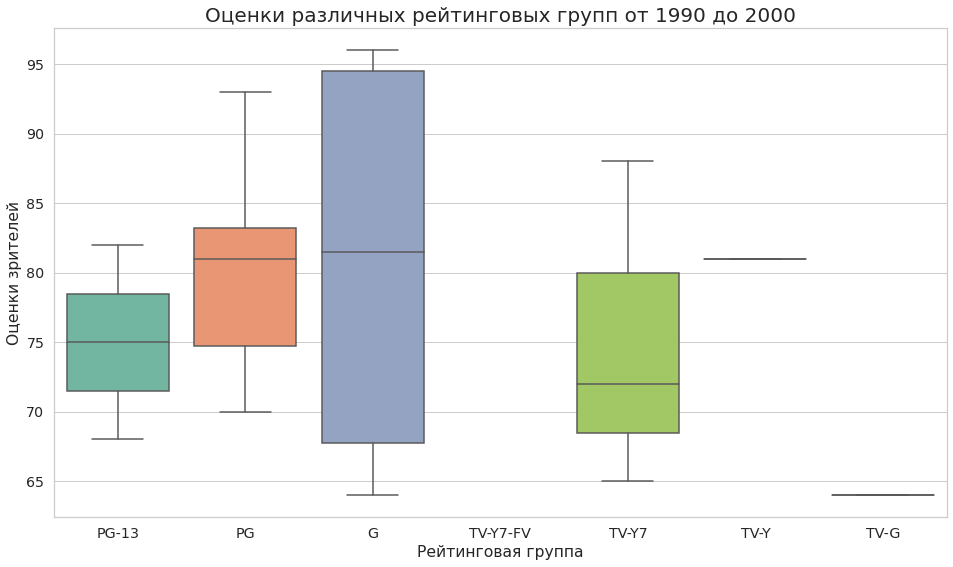

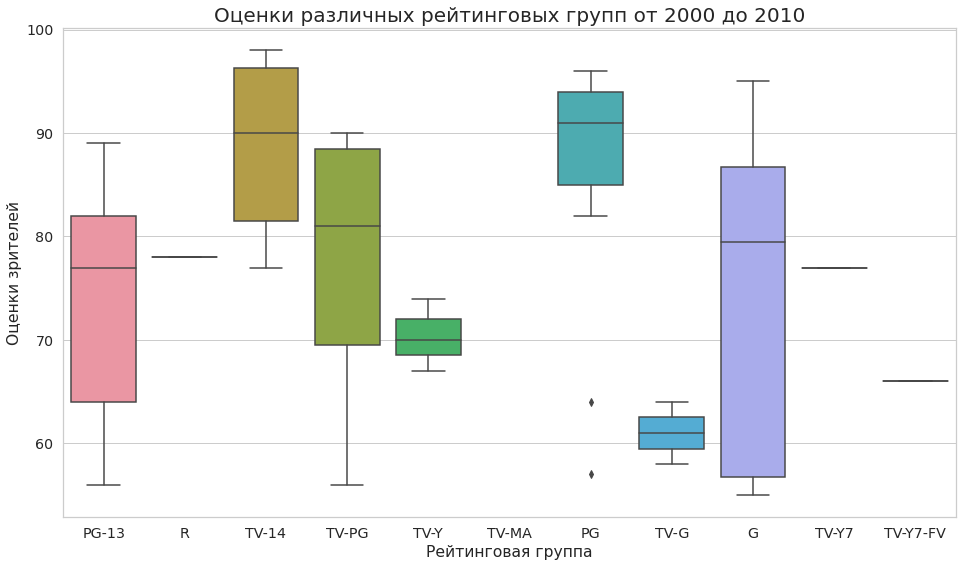

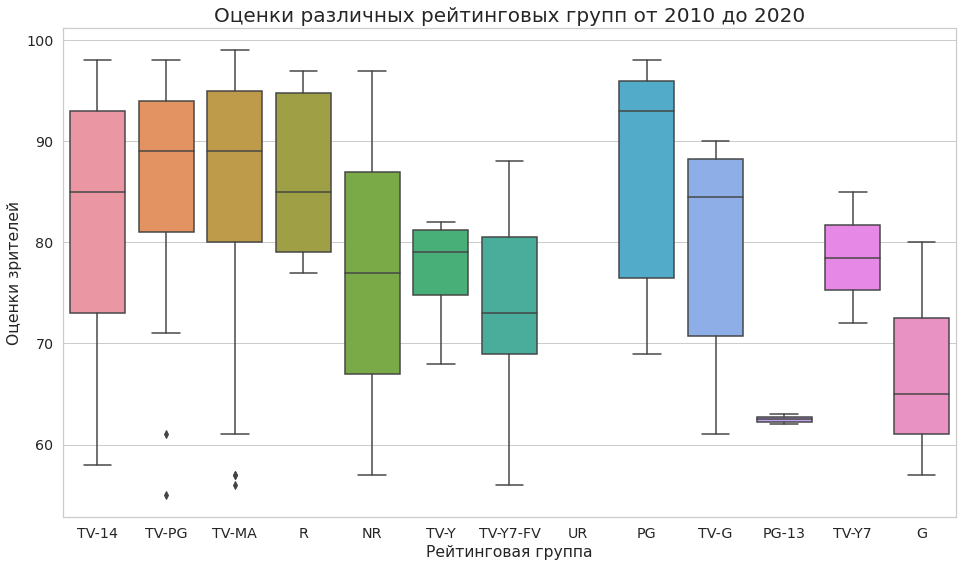

In [37]:
for decade in range(1980,2011,10):
    plt.figure(figsize=(16,9))
    decade_data = data[(data['release year'] >= decade) & (data['release year'] < decade + 10)]
    sns.boxplot(x = 'rating', y  = 'user rating score', data = decade_data)
    plt.xlabel('Рейтинговая группа')
    plt.ylabel('Оценки зрителей')
    plt.title(f'Оценки различных рейтинговых групп от {decade} до {decade+10}', fontsize = 20)

**Вывод:** Из данных четырех графиков можно заключить, что каждое десятилетие среднее качество всех шоу становилось лучше. Самый стабильный рост за 4 десятилетия показала рейтинговая компания "PG". Наибольший регресс можно заметить у группы "G", которая в 90-е годы была лучшей группой, а в 10-ых годах стала одной из наиболее низкооценных групп десятилетия. Также, с учетом графика за последние 5 лет можно сделать вывод, что рейтинговая группа "R" показала хороший рост.

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [38]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

id                  name
0    1      Film & Animation
1    2      Autos & Vehicles
2   10                 Music
3   15        Pets & Animals
4   17                Sports
5   18          Short Movies
6   19       Travel & Events
7   20                Gaming
8   21         Videoblogging
9   22        People & Blogs
10  23                Comedy
11  24         Entertainment
12  25       News & Politics
13  26         Howto & Style
14  27             Education
15  28  Science & Technology
16  30                Movies
17  31       Anime/Animation
18  32      Action/Adventure
19  33              Classics
20  34                Comedy
21  35           Documentary
22  36                 Drama
23  37                Family
24  38               Foreign
25  39                Horror
26  40        Sci-Fi/Fantasy
27  41              Thriller
28  42                Shorts
29  43                 Shows
30  44              Trailers

Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [39]:
videos = pd.merge(videos, category, left_on = 'category_id',right_on = 'id',how = 'inner')
videos = videos.drop(columns = 'id')
videos = videos.rename(columns={"name": "category_name"})
videos.head(8)

day  category_id   views  likes  dislikes  comment_count   category_name
0   14           22   62408    334       190             50  People & Blogs
1   14           22  330043  43841      2244           2977  People & Blogs
2   14           22  112851   3566       122             80  People & Blogs
3   14           22   97006   2259       330            887  People & Blogs
4   14           22  148974   5434      5247           1612  People & Blogs
5   14           22  332741   8358      2228            966  People & Blogs
6   14           22   79197    225       343            119  People & Blogs
7   14           22   77786   1769       290           1689  People & Blogs

Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [40]:
views_info = pd.pivot_table(
    videos,
    values = 'views',
    index = ['day'], 
    columns = ['category_name'],
    aggfunc =  np.sum, 
)
views_info = views_info.fillna(0)
views_info

category_name  Autos & Vehicles     Comedy  Education  Entertainment  \
day                                                                    
14                    1350890.0  2310887.0   139723.0      5010384.0   
15                    2076443.0  4152389.0    28850.0      5289490.0   
16                    2051608.0  4156893.0     6963.0      3373346.0   
17                    1386676.0  3556025.0   146943.0     12299938.0   
18                    1713087.0  3806238.0   256076.0      7519942.0   
19                    1736740.0  3556578.0   310830.0      5877590.0   
20                     962761.0  5648120.0   270585.0      8174020.0   
21                    1421017.0  4627423.0   186909.0      4585563.0   

category_name  Film & Animation     Gaming  Howto & Style      Music  \
day                                                                    
14                     636616.0   885597.0      2191619.0   733907.0   
15                     931837.0  1609621.0      1562421.0  1585619.0   
16                    1160112.0  1583149.0       129763.0  4720464.0   
17                    1820958.0   557074.0      1250164.0  9179397.0   
18                    2725012.0   600307.0      1468139.0  6972429.0   
19                    1075440.0   193316.0       156958.0  1329904.0   
20                    2574276.0   851814.0      1402284.0  1527219.0   
21                    2532978.0   981217.0       350009.0   809274.0   

category_name  News & Politics  People & Blogs  Pets & Animals  \
day                                                              
14                   1010044.0       4740267.0       2013597.0   
15                   1225112.0       4931179.0             0.0   
16                   1174092.0       4763680.0        608073.0   
17                   1251367.0       5976118.0        541708.0   
18                   1056007.0       5154219.0         16179.0   
19                   1028665.0       4353670.0         12928.0   
20                    657263.0       4628820.0          8792.0   
21                   1214178.0       6889111.0        164127.0   

category_name  Science & Technology     Shows     Sports  Travel & Events  
day                                                                        
14                        2053694.0  951608.0   608587.0         104076.0  
15                        6637302.0  656799.0  1181720.0         136549.0  
16                        6855094.0  548936.0  1193647.0           2271.0  
17                        2521015.0  609770.0   577087.0              0.0  
18                        8351102.0  808860.0    64261.0         253369.0  
19                        9396340.0       0.0   911646.0         406558.0  
20                         818570.0  491488.0   600913.0         186876.0  
21                         638900.0  164981.0   722192.0          26321.0

Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

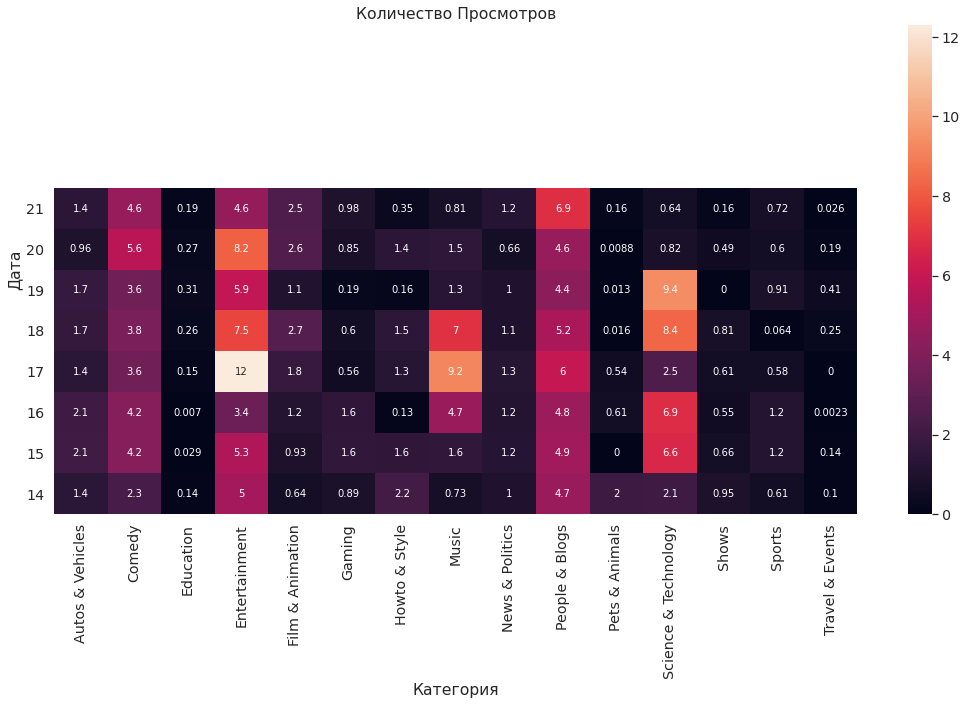

In [41]:
views_info = views_info / 10**6
plt.figure(figsize = (18,9))
sns.heatmap(views_info, annot = True)
plt.ylim((0, 12))
plt.xlabel('Категория')
plt.yticks(rotation = 0)
plt.ylabel("Дата")
plt.title("Количество Просмотров")
plt.show()

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [42]:
views_info_margins = pd.pivot_table(
    videos,
    values = 'views',
    index = ['day'], 
    columns = ['category_name'],
    aggfunc =  np.sum,
    margins = True,
    margins_name = 'Всего просмотров',
)
views_info_margins = views_info_margins.fillna(0)
views_info_margins

category_name     Autos & Vehicles      Comedy  Education  Entertainment  \
day                                                                        
14                       1350890.0   2310887.0   139723.0      5010384.0   
15                       2076443.0   4152389.0    28850.0      5289490.0   
16                       2051608.0   4156893.0     6963.0      3373346.0   
17                       1386676.0   3556025.0   146943.0     12299938.0   
18                       1713087.0   3806238.0   256076.0      7519942.0   
19                       1736740.0   3556578.0   310830.0      5877590.0   
20                        962761.0   5648120.0   270585.0      8174020.0   
21                       1421017.0   4627423.0   186909.0      4585563.0   
Всего просмотров        12699222.0  31814553.0  1346879.0     52130273.0   

category_name     Film & Animation     Gaming  Howto & Style       Music  \
day                                                                        
14                        636616.0   885597.0      2191619.0    733907.0   
15                        931837.0  1609621.0      1562421.0   1585619.0   
16                       1160112.0  1583149.0       129763.0   4720464.0   
17                       1820958.0   557074.0      1250164.0   9179397.0   
18                       2725012.0   600307.0      1468139.0   6972429.0   
19                       1075440.0   193316.0       156958.0   1329904.0   
20                       2574276.0   851814.0      1402284.0   1527219.0   
21                       2532978.0   981217.0       350009.0    809274.0   
Всего просмотров        13457229.0  7262095.0      8511357.0  26858213.0   

category_name     News & Politics  People & Blogs  Pets & Animals  \
day                                                                 
14                      1010044.0       4740267.0       2013597.0   
15                      1225112.0       4931179.0             0.0   
16                      1174092.0       4763680.0        608073.0   
17                      1251367.0       5976118.0        541708.0   
18                      1056007.0       5154219.0         16179.0   
19                      1028665.0       4353670.0         12928.0   
20                       657263.0       4628820.0          8792.0   
21                      1214178.0       6889111.0        164127.0   
Всего просмотров        8616728.0      41437064.0       3365404.0   

category_name     Science & Technology      Shows     Sports  Travel & Events  \
day                                                                             
14                           2053694.0   951608.0   608587.0         104076.0   
15                           6637302.0   656799.0  1181720.0         136549.0   
16                           6855094.0   548936.0  1193647.0           2271.0   
17                           2521015.0   609770.0   577087.0              0.0   
18                           8351102.0   808860.0    64261.0         253369.0   
19                           9396340.0        0.0   911646.0         406558.0   
20                            818570.0   491488.0   600913.0         186876.0   
21                            638900.0   164981.0   722192.0          26321.0   
Всего просмотров            37272017.0  4232442.0  5860053.0        1116020.0   

category_name     Всего просмотров  
day                                 
14                        24741496  
15                        32005331  
16                        32328091  
17                        41674240  
18                        40765227  
19                        30347163  
20                        28803801  
21                        25314200  
Всего просмотров         255979549

В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

Проблема заключается в том, что ввиду больших значений в ячейках тяжело анализировать и оценивать,  в какой день и у какой категории было больше просмотров. Решение данной проблемы -- некоторая нормировка. Разделим все значения на 10^6.

In [43]:
views_info_margins = views_info_margins / 10**6
views_info_margins

category_name     Autos & Vehicles     Comedy  Education  Entertainment  \
day                                                                       
14                        1.350890   2.310887   0.139723       5.010384   
15                        2.076443   4.152389   0.028850       5.289490   
16                        2.051608   4.156893   0.006963       3.373346   
17                        1.386676   3.556025   0.146943      12.299938   
18                        1.713087   3.806238   0.256076       7.519942   
19                        1.736740   3.556578   0.310830       5.877590   
20                        0.962761   5.648120   0.270585       8.174020   
21                        1.421017   4.627423   0.186909       4.585563   
Всего просмотров         12.699222  31.814553   1.346879      52.130273   

category_name     Film & Animation    Gaming  Howto & Style      Music  \
day                                                                      
14                        0.636616  0.885597       2.191619   0.733907   
15                        0.931837  1.609621       1.562421   1.585619   
16                        1.160112  1.583149       0.129763   4.720464   
17                        1.820958  0.557074       1.250164   9.179397   
18                        2.725012  0.600307       1.468139   6.972429   
19                        1.075440  0.193316       0.156958   1.329904   
20                        2.574276  0.851814       1.402284   1.527219   
21                        2.532978  0.981217       0.350009   0.809274   
Всего просмотров         13.457229  7.262095       8.511357  26.858213   

category_name     News & Politics  People & Blogs  Pets & Animals  \
day                                                                 
14                       1.010044        4.740267        2.013597   
15                       1.225112        4.931179        0.000000   
16                       1.174092        4.763680        0.608073   
17                       1.251367        5.976118        0.541708   
18                       1.056007        5.154219        0.016179   
19                       1.028665        4.353670        0.012928   
20                       0.657263        4.628820        0.008792   
21                       1.214178        6.889111        0.164127   
Всего просмотров         8.616728       41.437064        3.365404   

category_name     Science & Technology     Shows    Sports  Travel & Events  \
day                                                                           
14                            2.053694  0.951608  0.608587         0.104076   
15                            6.637302  0.656799  1.181720         0.136549   
16                            6.855094  0.548936  1.193647         0.002271   
17                            2.521015  0.609770  0.577087         0.000000   
18                            8.351102  0.808860  0.064261         0.253369   
19                            9.396340  0.000000  0.911646         0.406558   
20                            0.818570  0.491488  0.600913         0.186876   
21                            0.638900  0.164981  0.722192         0.026321   
Всего просмотров             37.272017  4.232442  5.860053         1.116020   

category_name     Всего просмотров  
day                                 
14                       24.741496  
15                       32.005331  
16                       32.328091  
17                       41.674240  
18                       40.765227  
19                       30.347163  
20                       28.803801  
21                       25.314200  
Всего просмотров        255.979549

Теперь сравнивать значения в ячейках намного проще.

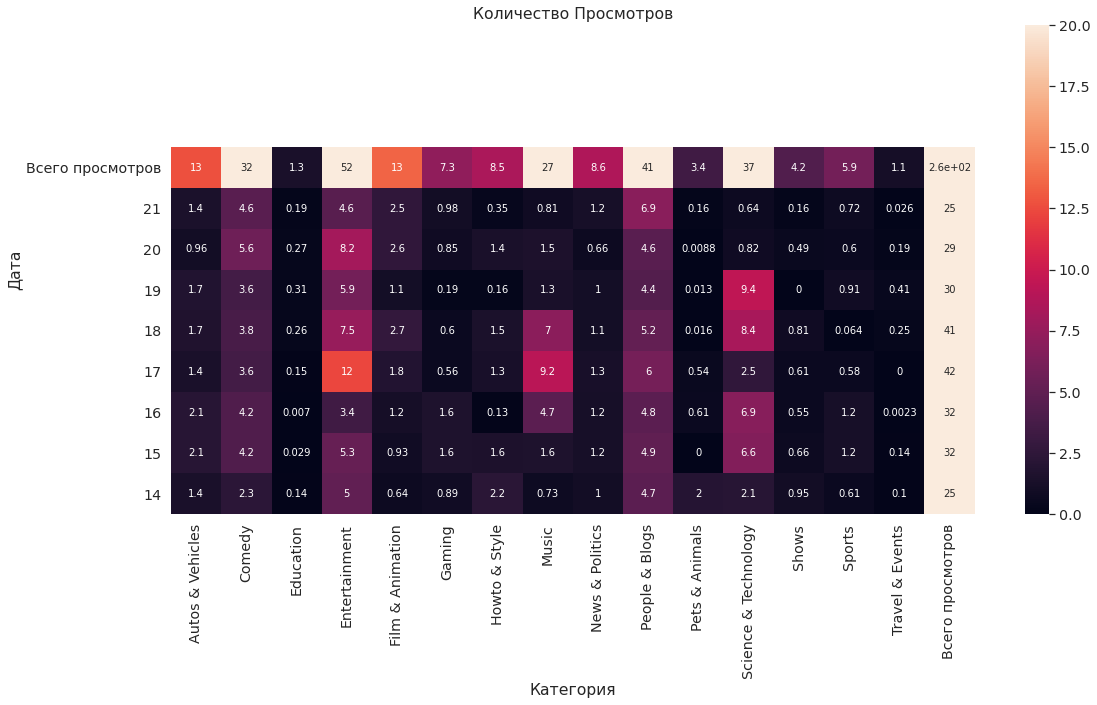

In [44]:
plt.figure(figsize = (18,9))
sns.heatmap(views_info_margins, annot = True, vmax = 20)
plt.ylim((0, 12))
plt.yticks(rotation = 0)
plt.xlabel('Категория')
plt.ylabel("Дата")
plt.title("Количество Просмотров")
plt.show()

**Вывод:** Если брать статистику по дням, то больше всего просмотров было 17 и 18 числа. Каждый день происходило не менее 25 миллионов просмотров. Если брать статистику по категориям, то самой популярной из них является категория "Entertaiment". Также, популярными являются категории "Comedy", "People & Blogs", "Science & Technology" и "Music" (более 25 млн. просмотров за 8 дней). Наименее популярными являются категории "Travel & Events" и "Education".

---

### Задача 5

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

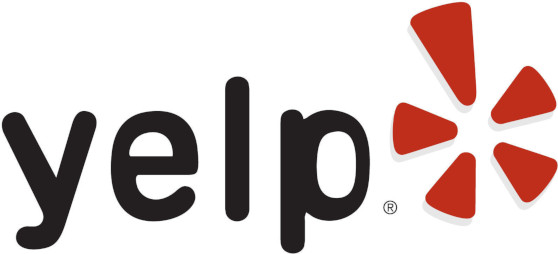

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [45]:
business_info = pd.read_csv('yelp_business.csv')
business_info.head()

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [46]:
city_id_info = business_info[['city','business_id']].drop_duplicates()
city_id_info.groupby('city').count().sort_values('business_id',ascending = False).head()

business_id
city                   
Las Vegas         26775
Phoenix           17213
Toronto           17206
Charlotte          8553
Scottsdale         8228

Городом с наибольшим количеством компаний является Лас-Вегас.

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

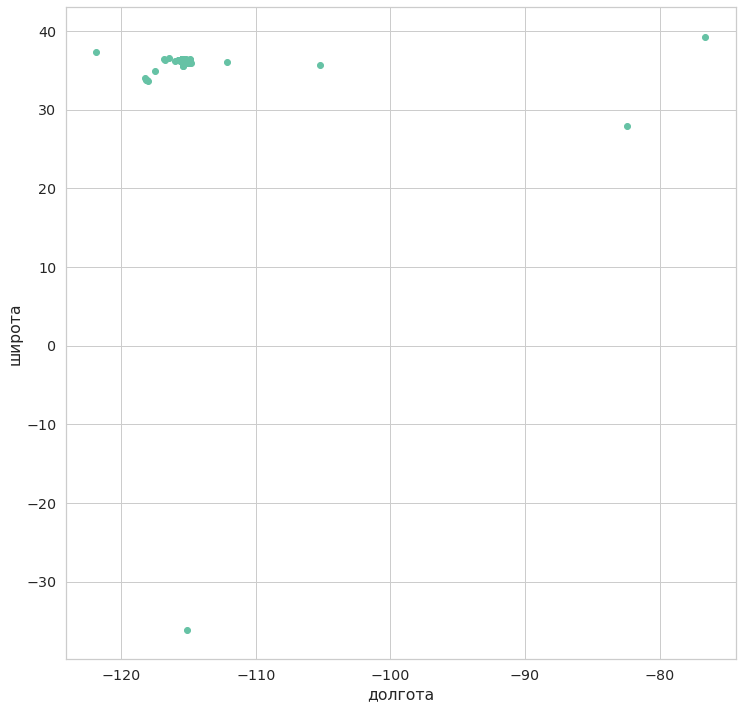

In [68]:
business_vegas = business_info[business_info.city == 'Las Vegas']
plt.figure(figsize = (12,12))
fig = plt.scatter(
    x = business_vegas.longitude,
    y = business_vegas.latitude
)
plt.xlabel('долгота')
plt.ylabel('широта')
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком. Попробуйте также для графиков в этой задаче автоматически подгружать карту города в качестве фона графика, используя <a href="https://plotly.com/python/scattermapbox/">примеры</a>.

*Замечание. Если у вас возникает ошибка `Notebook validation failed`, попробуйте открыть ноутбук текстовым редактором и в самом конце заменить `"nbformat_minor": 1` на `"nbformat_minor": 4`.*

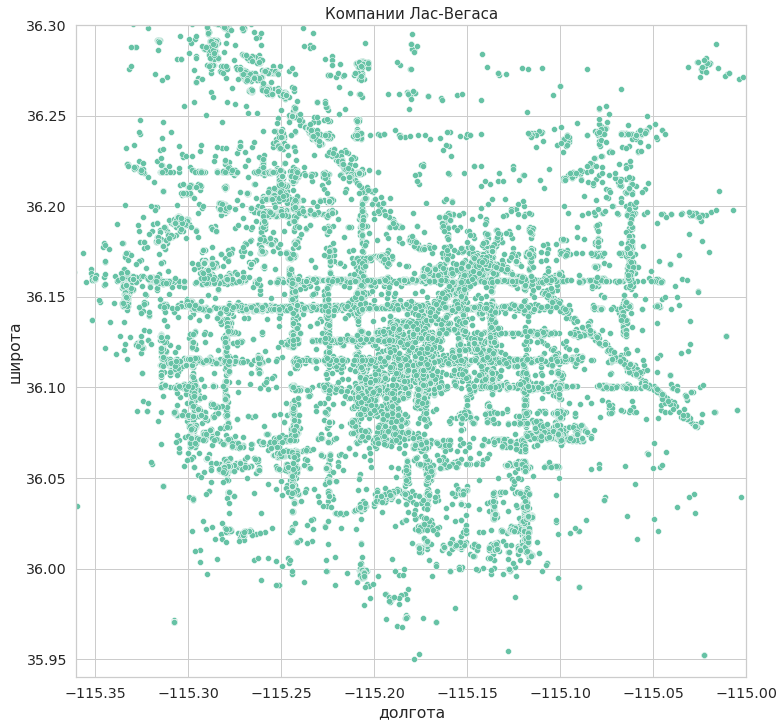

In [48]:
plt.figure(figsize = (12,12))
fig = sns.scatterplot(
    x = 'longitude',
    y = 'latitude',
    data  = business_vegas
)
fig.set(xlabel = 'долгота', ylabel = 'широта')
plt.title('Компании Лас-Вегаса', fontsize = 15)
plt.xlim(-115.36,-115.00)
plt.ylim(35.94,36.3)
plt.show()

In [49]:
import plotly.express as px
px.set_mapbox_access_token(open("token").read())
business_vegas1 = business_vegas[(business_vegas.latitude >= 35.94) & (business_vegas.latitude <= 36.33)] 
business_vegas2 = business_vegas1[(business_vegas.latitude >= -115.36) & (business_vegas.latitude <=115.0)]
fig = px.scatter_mapbox(business_vegas2, lat="latitude", lon="longitude",
                        labels = {'longitude': 'долгота', 'latitude': 'широта'},
                  color_continuous_scale=px.colors.cyclical.IceFire,opacity = 0.07, zoom=9.5)
fig.show()

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [50]:
review_info = pd.read_csv('yelp_review.csv')
review_info.head()

Unnamed: 0             business_id  stars
0           0  AEx2SYEUJmTxVVB18LlCwA      5
1           1  VR6GpWIda3SfvPC-lg9H3w      5
2           2  CKC0-MOWMqoeWf6s-szl8g      5
3           3  ACFtxLv8pGrrxMm6EgjreA      4
4           4  s2I_Ni76bjJNK9yG60iD-Q      4

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [51]:
vegas_ind = business_vegas.set_index('business_id')
review_info = review_info.set_index('business_id').loc[vegas_ind.index]
review_info = review_info.reset_index().set_index('Unnamed: 0').sort_index()
review_info.head()

business_id  stars
Unnamed: 0                               
5           8QWPlVQ6D-OExqXoaD2Z1g      5
87          pLZ9oZM8c6MNbRlg06lBPg      1
105         6Q7-wkCPc1KF75jZLOTcMw      2
122         9Jc3W0aR9Xf2gcHI0rEXsw      1
123         xVEtGucSRLk5pxxN0t4i6g      5

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [52]:
review_info_groups = review_info.groupby('business_id').aggregate([np.mean, np.size])

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша.

In [53]:
review_info_groups.columns = ['stars', 'count']
review_info_groups.head()

stars  count
business_id                            
--9e1ONYQuAa-CB_Rrw7Tw  4.088904   1451
--DdmeR16TRb3LsjG0ejrQ  3.200000      5
--WsruI0IGEoeRmkErU5Gg  4.928571     14
--Y7NhBKzLTbNliMUX_wfg  4.875000      8
--e8PjCNhEz32pprnPhCwQ  3.473684     19

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [54]:
vegas_info = business_vegas.set_index('business_id').join(review_info_groups)
vegas_info = vegas_info[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]
vegas_info.head(6)

latitude   longitude  \
business_id                                     
kCoE3jvEtg6UVz5SOD3GVw  36.207430 -115.268460   
OD2hnuuTJI9uotcKycxg1A  36.197484 -115.249660   
VBHEsoXQb2AQ76J9l8h1uQ  36.085051 -115.119421   
1Jp_hmPNUZArNqzpbm7B0g  36.056382 -115.269332   
DPQnTnNw2PJj7DdENM98Cw  36.105196 -115.056880   
_F3AMoo_zdl-he384ISQbw  36.116965 -115.185696   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
VBHEsoXQb2AQ76J9l8h1uQ       Shopping;Jewelry;Watch Repair;Local Services   
1Jp_hmPNUZArNqzpbm7B0g  Home Services;Lighting Fixtures & Equipment;Lo...   
DPQnTnNw2PJj7DdENM98Cw       Nurseries & Gardening;Home & Garden;Shopping   
_F3AMoo_zdl-he384ISQbw               Arts & Entertainment;Performing Arts   

                                       name     stars  count  
business_id                                                   
kCoE3jvEtg6UVz5SOD3GVw         "BDJ Realty"  4.000000      5  
OD2hnuuTJI9uotcKycxg1A        "Soccer Zone"  1.444444      9  
VBHEsoXQb2AQ76J9l8h1uQ  "Alfredo's Jewelry"  4.739130     23  
1Jp_hmPNUZArNqzpbm7B0g      "Task Electric"  4.450000     20  
DPQnTnNw2PJj7DdENM98Cw       "Star Nursery"  3.680000     25  
_F3AMoo_zdl-he384ISQbw       "Rock of Ages"  4.084507    213

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

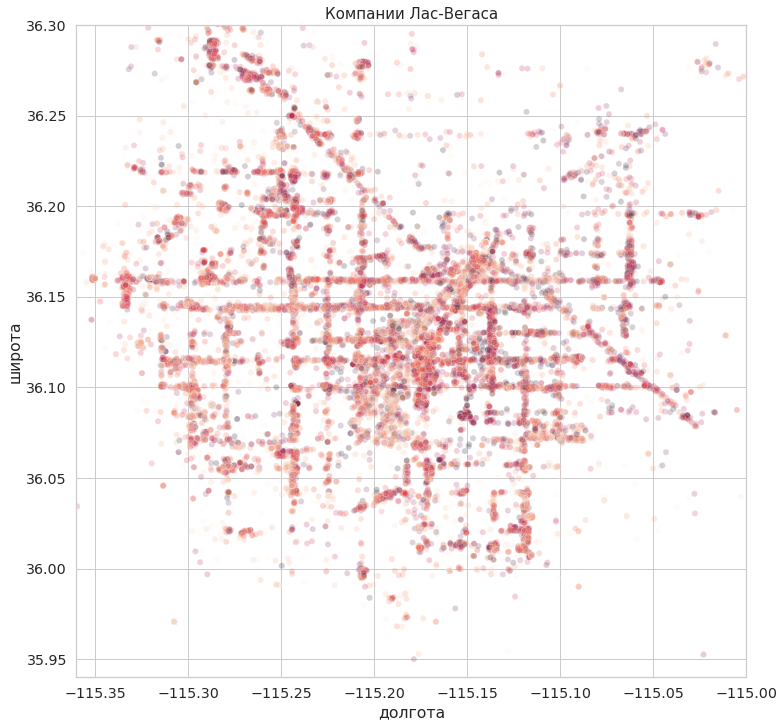

In [55]:
plt.figure(figsize = (12,12))
fig = sns.scatterplot(
    x = 'longitude',
    y = 'latitude',
    data  = vegas_info,
    c = vegas_info.stars,
    alpha = 0.2
)
fig.set(xlabel = 'долгота', ylabel = 'широта')
plt.title('Компании Лас-Вегаса', fontsize = 15)
plt.xlim(-115.36,-115.00)
plt.ylim(35.94,36.3)
plt.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [56]:
longitude = vegas_info.longitude
latitude = vegas_info.latitude
vegas_info.groupby(
    [np.round(longitude*5, decimals=1)*0.2, np.round(latitude*5, decimals= 1) * 0.2]).count()

latitude  longitude  categories  name  stars  count
longitude latitude                                                     
-121.86   37.38            1          1           1     1      1      1
-118.24   34.04            1          1           1     1      1      1
-118.18   33.76            1          1           1     1      1      1
-118.08   33.82            1          1           1     1      1      1
-118.00   33.70            1          1           1     1      1      1
...                      ...        ...         ...   ...    ...    ...
-114.80   35.96            1          1           1     1      1      1
-112.14   36.06            1          1           1     1      1      1
-105.22   35.62            1          1           1     1      1      1
-82.46    27.96            1          1           1     1      1      1
-76.62    39.28            1          1           1     1      1      1

[327 rows x 6 columns]

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [57]:
districts_info = pd.pivot_table(
    data = vegas_info,
    values = 'stars',
    index = np.round(np.round(longitude*5, decimals=1)*0.2,decimals= 2),
    columns = np.round(np.round(latitude*5, decimals=1)*0.2,decimals= 2),
    aggfunc = np.mean
)

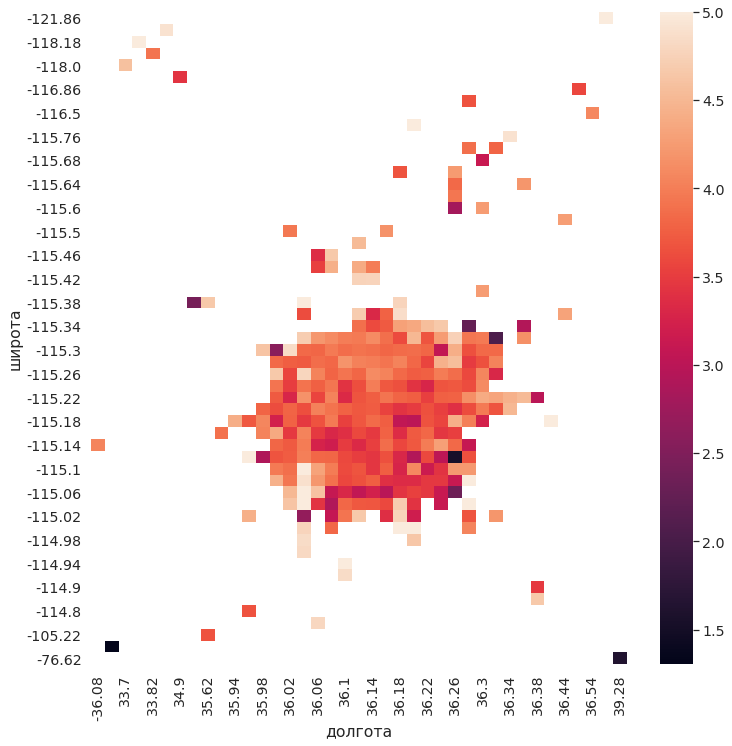

In [58]:
plt.figure(figsize = (12,12))
graph = sns.heatmap(districts_info)
graph.set(xlabel = 'долгота', ylabel = 'широта')
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 1. Если в районе мало компаний, то настоящая оценка может сильно различаться с полученной оценкой. 2. Можно необъективно оценить график, в предположении того, что цветовая гамма равномерна с 1 до 5. Может получится очень много районов приблизительно одного цвета, так есть выбросы в обе стороны.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [59]:
districts_info = pd.pivot_table(
    data = vegas_info,
    values = 'stars',
    index = np.round(np.round(longitude*5, decimals=1)*0.2,decimals= 2),
    columns = np.round(np.round(latitude*5, decimals=1)*0.2,decimals= 2),
    aggfunc = [np.size, np.mean],
)
big_districts_info = districts_info[districts_info['size'] >= 30]['mean']
big_districts_info = big_districts_info.dropna(how = 'all', axis = 0).dropna(how = 'all', axis = 1)
print(f'Худший рейтинг: {big_districts_info.min().min()}')
print(f'Лучший рейтинг: {big_districts_info.max().max()}')

Худший рейтинг: 2.912123976752063
Лучший рейтинг: 4.437638866186435


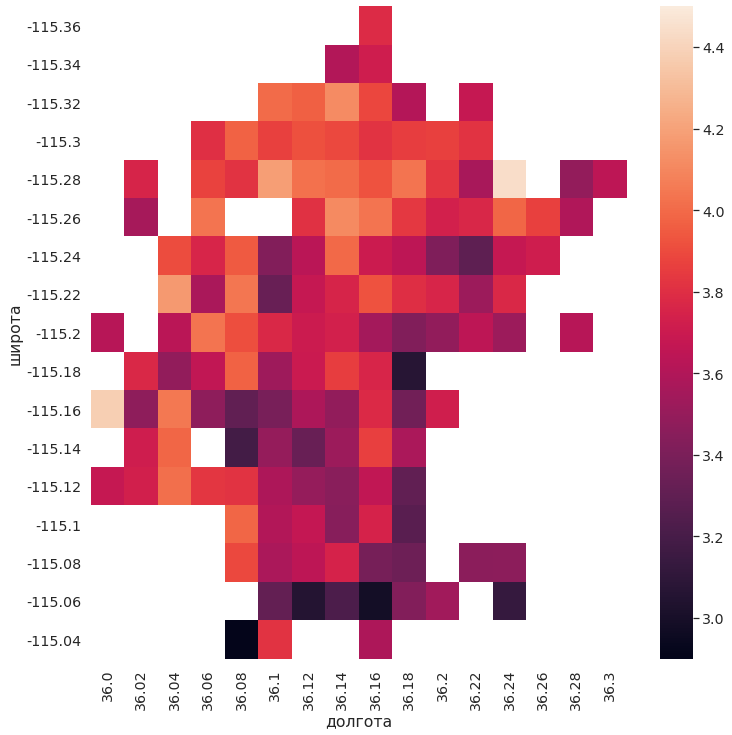

In [60]:
plt.figure(figsize = (12,12))
graph = sns.heatmap(big_districts_info, vmin = 2.9, vmax = 4.5)
graph.set(xlabel = 'долгота', ylabel = 'широта')
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** После того, как мы оставили районы только с 30+ компаниями, мы получили что их средние оценки лежат в пределах 2.9 до 4.5. Поэтому на данном графике мы выставили соответвующие пределы. Теперь, по сравнению с прошлым графиком, мы можем лучше различать оценки районов. Например, из данного графика можно сделать вывод, что на северо-западе города оценки лучше, чем в других районах.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [61]:
def find_func(text):
    small_text = text.lower()
    res = small_text.find('restaurant')
    if res == -1:
        return False
    return True
restaurants = vegas_info[vegas_info.categories.apply(find_func)]
restaurants = restaurants[restaurants['count'] > 4]
restaurants

latitude   longitude  \
business_id                                     
Pd52CjgyEU3Rb8co6QfTPw  36.066914 -115.170848   
4srfPk1s8nlm1YusyDUbjg  36.064652 -115.118954   
n7V4cD-KqqE3OXk0irJTyA  36.068259 -115.178877   
Wpt0sFHcPtV5MO9He7yMKQ  36.130013 -115.109310   
W1Yr6c2XDx_RBjb6WsV-aQ  36.170706 -115.190288   
...                           ...         ...   
Kbbm6Vd5UdbP10dwjBghRw  36.040628 -115.191256   
UpW3jyJ3_kTG7oDSflwnMA  36.114816 -115.230970   
e2ApirIzYID9xIye0r_gKQ  36.271006 -115.264392   
Fv4EXwV30rwGD2NzN1ekgA  36.100067 -115.127347   
6HdzmAatFoB8UDep4n9QIw  36.095080 -115.296775   

                                                               categories  \
business_id                                                                 
Pd52CjgyEU3Rb8co6QfTPw  Nightlife;Bars;Barbeque;Sports Bars;American (...   
4srfPk1s8nlm1YusyDUbjg                   Fast Food;Restaurants;Sandwiches   
n7V4cD-KqqE3OXk0irJTyA  Arcades;Arts & Entertainment;Gastropubs;Restau...   
Wpt0sFHcPtV5MO9He7yMKQ                      Restaurants;Fast Food;Burgers   
W1Yr6c2XDx_RBjb6WsV-aQ  Restaurants;Cafes;American (New);Bars;Nightlif...   
...                                                                   ...   
Kbbm6Vd5UdbP10dwjBghRw                      Restaurants;Fast Food;Burgers   
UpW3jyJ3_kTG7oDSflwnMA                                   Restaurants;Thai   
e2ApirIzYID9xIye0r_gKQ  Salad;Breakfast & Brunch;Sandwiches;Burgers;Re...   
Fv4EXwV30rwGD2NzN1ekgA       Asian Fusion;Restaurants;Japanese;Sushi Bars   
6HdzmAatFoB8UDep4n9QIw  Breakfast & Brunch;American (New);American (Tr...   

                                                         name     stars  count  
business_id                                                                     
Pd52CjgyEU3Rb8co6QfTPw              "Flight Deck Bar & Grill"  3.769231     13  
4srfPk1s8nlm1YusyDUbjg                               "Subway"  2.666667      6  
n7V4cD-KqqE3OXk0irJTyA                            "GameWorks"  3.117479    349  
Wpt0sFHcPtV5MO9He7yMKQ                           "McDonald's"  2.150000     20  
W1Yr6c2XDx_RBjb6WsV-aQ  "Divine Cafe at the Springs Preserve"  4.050000    140  
...                                                       ...       ...    ...  
Kbbm6Vd5UdbP10dwjBghRw                      "In-N-Out Burger"  4.196078    255  
UpW3jyJ3_kTG7oDSflwnMA                 "Archi's Thai Kitchen"  3.994695    377  
e2ApirIzYID9xIye0r_gKQ                          "Farmer Boys"  2.735955    178  
Fv4EXwV30rwGD2NzN1ekgA                        "Gorilla Sushi"  4.424490    245  
6HdzmAatFoB8UDep4n9QIw                                 "IHOP"  3.000000     82  

[5476 rows x 6 columns]

In [62]:
rest_distr = pd.pivot_table(
   data = restaurants, 
   values = 'stars',
   index = np.round(np.round(longitude*4, decimals=1)*0.25,decimals= 2),
   columns = np.round(np.round(latitude*4, decimals=1)*0.25,decimals= 2),
   aggfunc = [np.size, np.mean]

)
rest_distr = rest_distr[rest_distr['size'] >= 10]['mean']
rest_distr = rest_distr.dropna(how = 'all', axis = 0).dropna(how = 'all', axis = 1)

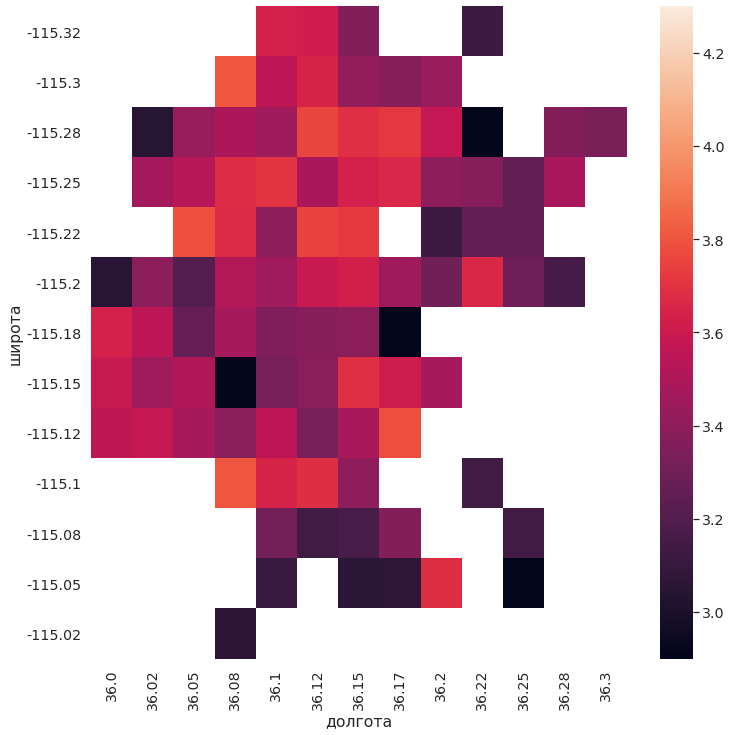

In [66]:
plt.figure(figsize = (12,12))
graph = sns.heatmap(rest_distr, vmin = 2.9, vmax = 4.3)
graph.set(xlabel = 'долгота', ylabel = 'широта')
plt.xticks(rotation = 90)
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Если о ресторане мало отзывов, то по нему сложно дать объективную оценку. Также, если в районе мало ресторанов, то по ним сложно дать объективную оценку району. Например, если в районе 1-2 ресторана с хорошими отзывами, то нельзя определенно сказать что район хороший, так как для этого недостаточно данных.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [64]:
best_rests = restaurants[restaurants['count'] >= 50].sort_values('stars', ascending = False)
best_rests = best_rests[['name','stars', 'count','longitude', 'latitude', 'categories']].reset_index()
best_rests.head(10)

business_id                           name     stars  count  \
0  iBPyahdJRP5y0t25fF2W9w    "Lip Smacking Foodie Tours"  4.966480    179   
1  Fmij544FE1iOruoxI41kew                 "Pepito Shack"  4.907692     65   
2  qw9SyduMZ53KB6GlBQqvZQ               "Bosa Boba Cafe"  4.890909     55   
3  k9b96JXlNewj36ddrce9Jw                 "Garden Grill"  4.868132     91   
4  IhNASEZ3XnBHmuuVnWdIwA                 "Brew Tea Bar"  4.848069   1165   
5  k5ddmLvAKKw9zSusRPM2cQ               "Poppa Naps BBQ"  4.836538    104   
6  8fFTJBh0RB2EKG53ibiBKw               "Zenaida's Cafe"  4.833333    180   
7  l1GJnB9TJgGgEeI4at1M0A   "El Frescos Cocina Mexicana"  4.816754    191   
8  hFT3HuxVZJb1uYEsYfp-0A  "Blaqcat Ultra Hookah Lounge"  4.809524     63   
9  wZkjm9TGa7nXLYHxhIRO5w     "California Sushi Burrito"  4.807018     57   

    longitude   latitude                                         categories  
0 -115.172678  36.114537  Food Tours;Restaurants;Event Planning & Servic...  
1 -115.151945  36.152477  Restaurants;Burgers;Food Stands;Sandwiches;Hot...  
2 -115.184846  36.125960  Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...  
3 -115.286197  36.166783  Tacos;Street Vendors;Farmers Market;Vegetarian...  
4 -115.242443  36.054195  Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...  
5 -115.088115  36.116549  Food Stands;Hot Dogs;Caterers;Restaurants;Amer...  
6 -115.100359  36.101741               Restaurants;Breakfast & Brunch;Cafes  
7 -115.148446  36.098527  Caterers;Mexican;Restaurants;Food;Event Planni...  
8 -115.232738  36.159742  Adult Entertainment;Lounges;Hookah Bars;Restau...  
9 -115.202487  36.125636  Asian Fusion;Fast Food;Restaurants;Japanese;Po...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

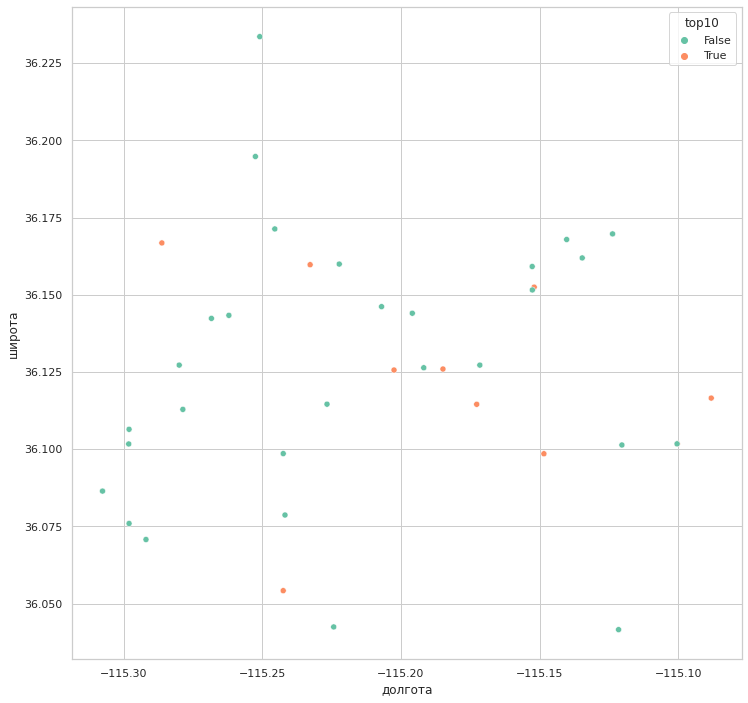

In [65]:
best_rests = best_rests[best_rests.stars >= 4.7]
best_rests['top10'] = False
best_rests.loc[best_rests.head(10).index, 'top10'] = True
plt.figure(figsize = (12,12))
with sns.plotting_context('notebook'):
    graph = sns.scatterplot(
        x = 'longitude',
        y = 'latitude',
        hue = 'top10',
        data = best_rests,
    )
    graph.set(xlabel = 'долгота', ylabel = 'широта')

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий выбирает себе лучший ресторан на основе 2 критериев: ресторан должен быть проверенным (много отзывов) и эти отзывы должны быть как можно лучше (лучшая средняя оценка). Из этого можно сделать вывод, что кот Василий является неплохим аналитиком.
    Что касается вывода по задаче, то мы смогли найти город с наибольшим числом компаний, разделить этот город на равные районы, оценить эти районы по количеству и рейтингу компаний на графиках. Разобрались, какие недостатки имеют эти графики, попробовали исправить часть их них. Наконец, помогли коту Василию грамотно выбрать лучшие рестораны Лас-Вегаса.